### Comparative plot for Vision Zero Code ###
by Richard Sowers

* <r-sowers@illinois.edu>

<https://publish.illinois.edu/r-sowers/>

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

imports

In [6]:
%matplotlib inline
from matplotlib import pylab as plotter
import pandas
import numpy
import importlib
import MAIN_makeplots_numtrips as makeplots
import pickle
import MAIN_config_hour_of_day as config
#import MAIN_config_season as config

External files

In [7]:
dir_names=config.dirnames
curvefigfile="curve_compare_trips_MRH.png"
scatterfigfile="scatter_compare_trips_MRH.png"

In [8]:
timewin = "Morning_RushHour"
TradeoffDict={}
dataName="ManhattanComputations"+"/FINAL_"+timewin+"/data.p"
data1=pickle.load(open(dataName,"rb"))
TradeoffDict["Manhattan "+"morning rush hour"]=makeplots.tradeoff(data1)
dataName2 = "UpperManComps/FINAL_"+timewin+"/data.p"
data2=pickle.load(open(dataName2,"rb"))
TradeoffDict["Upper Manhattan "+ "morning rush hour"]=makeplots.tradeoff(data2)

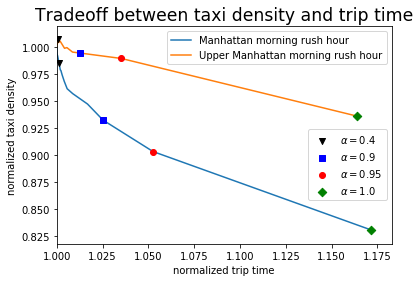

In [12]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    points=tradeoff.curve()
    l, = plotter.plot(points["rel_time"],points["rel_trips"],label=windowname,zorder=1)
    s1=plotter.scatter(points["rel_time"].iloc[5],points["rel_trips"].iloc[5],label=None,marker = 'v',zorder=4,color='black')
    s2=plotter.scatter(points["rel_time"].iloc[13],points["rel_trips"].iloc[13],label=None,marker = 's',zorder=3,color='blue')
    s3=plotter.scatter(points["rel_time"].iloc[14],points["rel_trips"].iloc[14],label=None,marker = 'o',zorder=5,color='red')
    s4=plotter.scatter(points["rel_time"].iloc[15],points["rel_trips"].iloc[15],label=None,marker = 'D',zorder=2,color='green')
plotter.xlim(1,)
plotter.title("Tradeoff between taxi density and trip time",fontsize = 'xx-large')
plotter.xlabel("normalized trip time",fontsize='medium')
plotter.ylabel("normalized taxi density",fontsize = 'medium')
legend2=plotter.legend((s1,s2,s3,s4),('$\\alpha=0.4$','$\\alpha=0.9$','$\\alpha=0.95$','$\\alpha=1.0$'),bbox_to_anchor=(1.0,.55))
plotter.legend()
plotter.gca().add_artist(legend2)
#plotter.legend(loc=0,prop={'size':8.5})
plotter.savefig(curvefigfile,bbox_inches='tight')
plotter.show()
plotter.close()

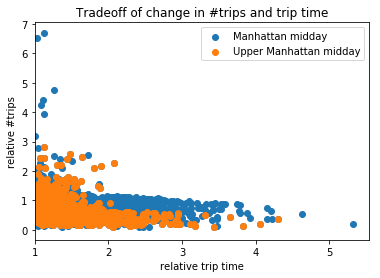

In [9]:
plotter.figure()
for windowname,tradeoff in TradeoffDict.items():
    scatterPoints=tradeoff.avoidancePoints()
    xvals=scatterPoints["trip_time"]
    yvals=scatterPoints["trip_num_trips"]
    plotter.scatter(xvals,yvals,label=windowname)
plotter.xlim(1,)
plotter.title("Tradeoff of change in #trips and trip time")
plotter.xlabel("relative trip time")
plotter.ylabel("relative #trips")
plotter.legend()
plotter.savefig(scatterfigfile,bbox_inches='tight')
plotter.show()
plotter.close()